# Crypto Currencies - Storage Sector

In [18]:
# private
import tradingview as tv
# public
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Coin List

In [2]:
storage_coins = {
    'FIL': 'Filecoin',
    'BTT': 'Bit Torrent',
    'SC': 'Siacoin',
    'ANKR': 'Ankr',
    'AR': 'Arweave',
}

In [23]:
flagship_coins = {
    'BTC': 'Bitcoin', 
    'ETH': 'Ethereum',
}

## Data

In [4]:
def download_list(dictionary):
    data = {coin: tv.history.bar1day.limit(365)(f'{coin}USD') 
            for coin in dictionary}
    return data

In [5]:
data_storage_coins = download_list(storage_coins)
data_flagship_coins = download_list(flagship_coins)

In [6]:
def combine_list(data, start='2021-01-01'):
    df = pd.concat({coin: df.set_index('time').loc[start:].close 
                    for coin, df in data.items()}, axis=1)
    return df

In [7]:
df_storage_coins = combine_list(data_storage_coins)
df_flagship_coins = combine_list(data_flagship_coins)

In [8]:
def cal_nav(df, ini_fund=1000):
    nav = df / df.iloc[0] * 1000
    return nav

In [9]:
nav_storage_coins = cal_nav(df_storage_coins)
nav_flagship_coins = cal_nav(df_flagship_coins)

## Per 1000 dollar Investment since 2021

<AxesSubplot:xlabel='time'>

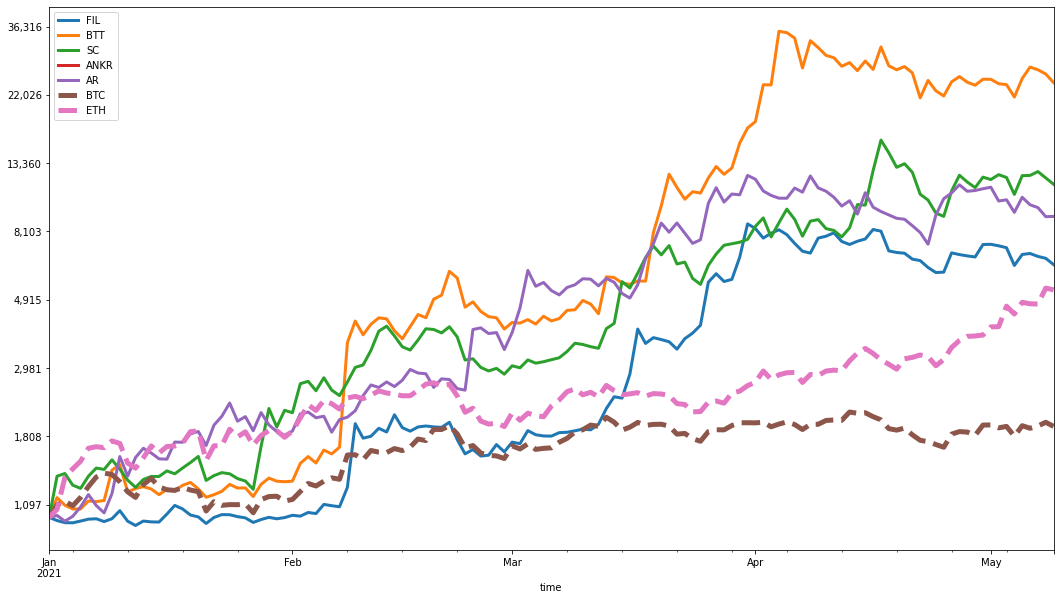

In [27]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.yaxis.set_major_formatter(lambda x,_: f'{np.exp(x):,.0f}')
np.log(nav_storage_coins).plot(lw=3, ax=ax)
np.log(nav_flagship_coins).plot(lw=5, ls='--', ax=ax)

Storage sector outperform flagship crypto currencies since Jan 2021

## Metrics Analysis

In [37]:
def selected_metrics(metrics):
    result = []
    for coin, metric in metrics.items():
        m = metric.metrics()
        selected = (m.mu, m.sigma, m.drawdown.percentage, m.sharpe, m.calmar)
        result.append(selected)
    df = pd.DataFrame(result, index=metrics.keys(), columns='mu sigma mdd sharpe calmar'.split(' '))
    return df

In [42]:
selected_metrics(data_storage_coins)

,mu,sigma,mdd,sharpe,calmar
FIL,3.737395,1.508470,-0.488303,2.477606,7.653850
BTT,3.278926,1.546768,-0.112867,2.119856,29.051140
SC,3.025031,1.426561,-0.599143,2.120505,5.048932
ANKR,2.078448,1.685696,-0.539974,1.232991,3.849161
AR,3.238599,1.769910,-0.787875,1.829810,4.110549


In [43]:
selected_metrics(data_flagship_coins)

,mu,sigma,mdd,sharpe,calmar
BTC,1.890724,0.674806,-0.314286,2.801877,6.015942
ETH,3.039588,0.911556,-0.366667,3.334505,8.289786
